In [1]:
import matplotlib.font_manager as font_manager
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import pandas as pd
import scipy
from tqdm import tqdm
import pickle
from utils.data_loading import load_disruption_distance, load_papers
from utils.figure_plot import plot_odd_ratio_with_colors, plot_difference_histograms

/home/munjkim/Publishing/embedding-disruptiveness_11252024/embedding-disruptiveness-private/libs/util/utils/figure_plot.py:6: SyntaxWarning: invalid escape sequence '\D'
  def plot_histogram(dataframe, column_name, bins=100, color='#2A66FF', alpha=1, figsize=(8, 5), xlabel='$\Delta$', ylabel='Frequency', output_path=None):
/home/munjkim/Publishing/embedding-disruptiveness_11252024/embedding-disruptiveness-private/libs/util/utils/figure_plot.py:141: SyntaxWarning: invalid escape sequence '\D'
  xlabel='Quantile of $\Delta$', ylabel='Frequency', figsize=(7, 5), alpha_fill=0.1, alpha_outline=1,output_path =None):


In [2]:
font_path = '../data/font/helvetica.ttf'
font_manager.fontManager.addfont(font_path)

prop = font_manager.FontProperties(family='Helvetica')

# Data Loading

#### Citation network

In [3]:
net = scipy.sparse.load_npz("/data/sg/munjkim/APS/original/citation_net.npz")
citations = np.array(net.sum(axis=0))[0]
references = np.array(net.sum(axis=1)).reshape((1,-1))[0]

#### Paper Information

In [4]:
papers_df = load_papers('/data/sg/munjkim/APS/paper_table.csv')
papers_df.head()

,paper_id,doi,year,date,journal_code,title,PACS1,PACS2,PACS3,PACS4,PACS5,category
0,0,10.1103/PhysRev.1.124,1913.0,1913-02-01,PR,An Absolute Determination of the Viscosity of Air,NaN,NaN,NaN,NaN,NaN,NaN
1,1,10.1103/PhysRev.1.16,1913.0,1913-01-01,PR,The Velocity of Electrons in the Photo-electri...,NaN,NaN,NaN,NaN,NaN,NaN
2,2,10.1103/PhysRev.1.218,1913.0,1913-03-01,PR,Brownian Movements in Gases at Low Pressures,NaN,NaN,NaN,NaN,NaN,NaN
3,3,10.1103/PhysRev.1.237,1913.0,1913-03-01,PR,Proceedings of the American Physical Society,NaN,NaN,NaN,NaN,NaN,NaN
4,4,10.1103/PhysRev.1.259,1913.0,1913-04-01,PR,The Annealing of Steel in an Alternating Magne...,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:

print("The number of papers is", len(papers_df))

print("Published between ", min(papers_df['year']), "and", max(papers_df['year']) )

The number of papers is 644022
Published between  1893.0 and 2019.0


In [6]:
papers_df['citations'] = papers_df['paper_id'].apply(lambda x: citations[x])
papers_df['references'] = papers_df['paper_id'].apply(lambda x: references[x])
papers_df = papers_df[papers_df['citations']>4]
papers_df = papers_df[papers_df['references']>0]

In [7]:
papers_df.head()

,paper_id,doi,year,date,journal_code,title,PACS1,PACS2,PACS3,PACS4,PACS5,category,citations,references
34,34,10.1103/PhysRev.10.495,1917.0,1917-11-01,PR,The Ionizing Potentials of Gases,NaN,NaN,NaN,NaN,NaN,NaN,5.0,2.0
39,39,10.1103/PhysRev.10.591,1917.0,1917-12-01,PR,Unipolar Induction and Electron Theory,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0
40,40,10.1103/PhysRev.10.609,1917.0,1917-12-01,PR,Total Ionization by slow Electrons,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0
44,44,10.1103/PhysRev.10.661,1917.0,1917-12-01,PR,A New Method of X-Ray Crystal Analysis,NaN,NaN,NaN,NaN,NaN,NaN,19.0,2.0
51,51,10.1103/PhysRev.100.1,1955.0,1955-10-01,PR,Independent-Particle Model of the Nucleus. II....,NaN,NaN,NaN,NaN,NaN,NaN,36.0,23.0


In [8]:
papers_df = papers_df[papers_df['year']<2017]

In [9]:

print("The number of papers is", len(papers_df))

print("Published between ", min(papers_df['year']), "and", max(papers_df['year']) )

The number of papers is 327021
Published between  1914.0 and 2016.0


# Loading EDM and Disruption

In [10]:
NETWORKS_NAME = ['original']
MEASURE = ['disruption',
           '100_5_q_1_ep_1_bs_256_embedding/distance',
           '100_1_q_1_ep_1_bs_1024_embedding/distance',
           '100_3_q_1_ep_1_bs_1024_embedding/distance',
           '100_5_q_1_ep_1_bs_1024_embedding/distance',
           '200_1_q_1_ep_1_bs_1024_embedding/distance',
           '200_3_q_1_ep_1_bs_1024_embedding/distance',
           '200_5_q_1_ep_1_bs_1024_embedding/distance',
           '300_1_q_1_ep_1_bs_1024_embedding/distance',
           '300_3_q_1_ep_1_bs_1024_embedding/distance',
           '300_5_q_1_ep_1_bs_1024_embedding/distance',
          'test_package_100_5_q_1_ep_1_bs_1024_embedding/distance' # calculateed based on the package
          ]
for net in NETWORKS_NAME:
    for m in MEASURE:
        papers_df = load_disruption_distance(papers_df,net,m,data='aps')

In [11]:
NETWORKS_NAME = ['random/random0']
MEASURE = ['disruption','100_5_q_1_ep_1_bs_1024_embedding/distance','n2v_None_200_5_q_1_embedding/distance']

for net in NETWORKS_NAME:
    for m in MEASURE:
        papers_df = load_disruption_distance(papers_df,net,m,data='aps')

# Milestone

In [12]:
milestones = pd.read_excel('../data/raw/APS_milestones_Nov_5_2024.xlsx', sheet_name= "Sheet1",engine='openpyxl')
set(milestones['type'])

{'125years',
 'PRE milestones',
 'PRL50yearsmilestones',
 'pra50yearsmilestones',
 'prb50yearsmilestones',
 'prc50yearsmilestones',
 'prd50yearsmilestones'}

In [13]:
milestones['doi'] = milestones['doi'].apply(lambda x: x.replace('\n','')) 
milestones_doi_lst = [doi for doi in milestones['doi'] ]
milestones_doi_lst = set(milestones_doi_lst)

In [14]:
milestones_papers_df = papers_df[papers_df['doi'].apply(lambda x: x in milestones_doi_lst)]

In [15]:
papers_df['milestone'] = papers_df['doi'].apply(lambda x: 1 if  x in milestones_doi_lst else 0)

## Logistic Regression

In [23]:
# papers_df[['PCNT_RANK_original_300_5_q_1_ep_1_bs_1024_embedding_distance',
#            'PCNT_RANK_original_300_3_q_1_ep_1_bs_1024_embedding_distance',
#             'PCNT_RANK_original_300_1_q_1_ep_1_bs_1024_embedding_distance',
#             'PCNT_RANK_original_200_5_q_1_ep_1_bs_1024_embedding_distance',
#             'PCNT_RANK_original_200_3_q_1_ep_1_bs_1024_embedding_distance',
#             'PCNT_RANK_original_200_1_q_1_ep_1_bs_1024_embedding_distance',
#            'PCNT_RANK_original_100_5_q_1_ep_1_bs_1024_embedding_distance',
#             'PCNT_RANK_original_100_3_q_1_ep_1_bs_1024_embedding_distance',
#             'PCNT_RANK_original_100_1_q_1_ep_1_bs_1024_embedding_distance',
#            'PCNT_RANK_original_n2v_None_200_5_q_1_embedding_distance',
#            'PCNT_RANK_original_disruption','citations','milestone','year']].to_csv('../data/derived/papers_milestone_regression.csv')

Regression is implemented in `R_regression.ipynb`

# MileStone

## EDM

### d = 100

#### result with embedding-disruptiveness package

<>:14: SyntaxWarning: invalid escape sequence '\D'
<>:14: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_206572/511194115.py:14: SyntaxWarning: invalid escape sequence '\D'
  xlabel='Quantile of $\Delta$',


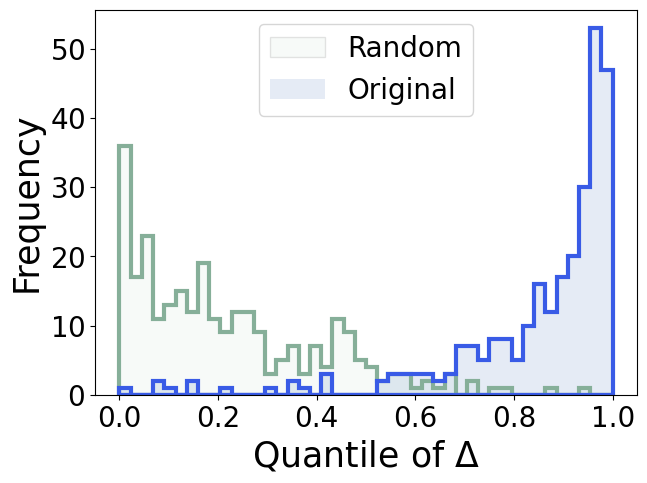

In [16]:

bins = np.linspace(0, 1, 45)

plot_difference_histograms(
    dataframe=milestones_papers_df,
    column1='PCNT_RANK_random/random0_100_5_q_1_ep_1_bs_1024_embedding_distance',
    column2='PCNT_RANK_original_test_package_100_5_q_1_ep_1_bs_1024_embedding_distance',
    bins=bins,
    label1='Random',
    label2='Original',
    color1='#b3d4c1',
    color2='#00429d',
    edgecolor1='#86af99',
    edgecolor2='#395be6',
    xlabel='Quantile of $\Delta$',
    legend_loc = ['upper center'],
    ylabel='Frequency',
    figsize=(7, 5)
)


#### result with workflow scripts

<>:13: SyntaxWarning: invalid escape sequence '\D'
<>:13: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_206572/1702897968.py:13: SyntaxWarning: invalid escape sequence '\D'
  xlabel='Quantile of $\Delta$',


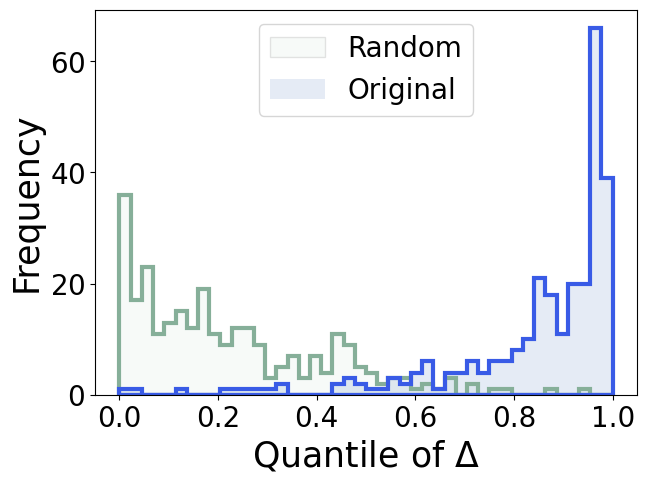

In [22]:
bins = np.linspace(0, 1, 45)
plot_difference_histograms(
    dataframe=milestones_papers_df,
    column1='PCNT_RANK_random/random0_100_5_q_1_ep_1_bs_1024_embedding_distance',
    column2='PCNT_RANK_original_100_5_q_1_ep_1_bs_1024_embedding_distance',
    bins=bins,
    label1='Random',
    label2='Original',
    color1='#b3d4c1',
    color2='#00429d',
    edgecolor1='#86af99',
    edgecolor2='#395be6',
    xlabel='Quantile of $\Delta$',
    ylabel='Frequency',
    legend_loc = ['upper center'],
    figsize=(7, 5),
    output_path= '../results/Figures/Figure3b_APS_Milestone_EDM_Distribution.png'
)


<>:10: SyntaxWarning: invalid escape sequence '\D'
<>:10: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_206572/866714735.py:10: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel('$\Delta$ Percentile',size=25)


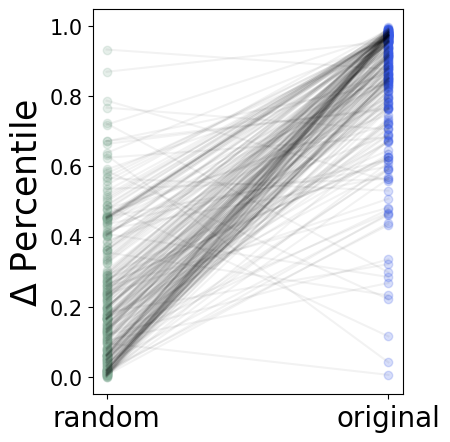

In [28]:
plt.figure(figsize = (4,5))

for i in range(len(milestones_papers_df)):
    plt.plot([0,1],[milestones_papers_df['PCNT_RANK_random/random0_100_5_q_1_ep_1_bs_1024_embedding_distance'].iloc[i], milestones_papers_df['PCNT_RANK_original_100_5_q_1_ep_1_bs_1024_embedding_distance'].iloc[i]], alpha=0.05,color='black')
plt.scatter([0]*len(milestones_papers_df),milestones_papers_df['PCNT_RANK_random/random0_100_5_q_1_ep_1_bs_1024_embedding_distance'],color=  '#86af99',alpha=0.2)
# plt.xlim([0,1])
plt.scatter([1]*len(milestones_papers_df),milestones_papers_df['PCNT_RANK_original_100_5_q_1_ep_1_bs_1024_embedding_distance'],color = '#395be6',alpha=0.2)
plt.xticks([0,1], ['random','original'],size=20)
plt.yticks(size=15)
plt.ylabel('$\Delta$ Percentile',size=25)
plt.savefig('../results/Figures/Figure3c_APS_Milestone_EDM_Distribution_Compare.png', bbox_inches = 'tight')

### d = 200

<>:13: SyntaxWarning: invalid escape sequence '\D'
<>:13: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_206572/2406195909.py:13: SyntaxWarning: invalid escape sequence '\D'
  xlabel='Quantile of $\Delta$',


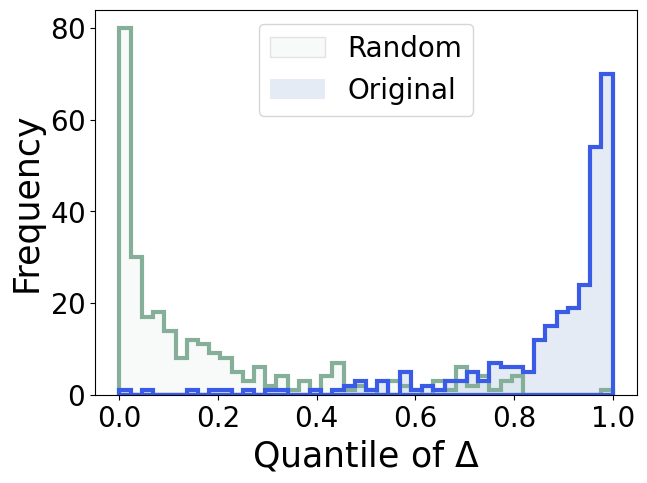

In [19]:
bins = np.linspace(0, 1, 45)
plot_difference_histograms(
    dataframe=milestones_papers_df,
    column1='PCNT_RANK_random/random0_n2v_None_200_5_q_1_embedding_distance',
    column2='PCNT_RANK_original_200_5_q_1_ep_1_bs_1024_embedding_distance',
    bins=bins,
    label1='Random',
    label2='Original',
    color1='#b3d4c1',
    color2='#00429d',
    edgecolor1='#86af99',
    edgecolor2='#395be6',
    xlabel='Quantile of $\Delta$',
    legend_loc = ['upper center'],
    ylabel='Frequency',
    figsize=(7, 5)
)


<>:10: SyntaxWarning: invalid escape sequence '\D'
<>:10: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_206572/1418376490.py:10: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel('$\Delta$ Percentile',size=25)


Text(0, 0.5, '$\\Delta$ Percentile')

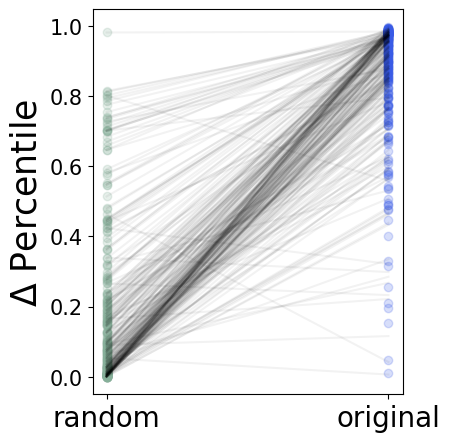

In [20]:
plt.figure(figsize = (4,5))

for i in range(len(milestones_papers_df)):
    plt.plot([0,1],[milestones_papers_df['PCNT_RANK_random/random0_n2v_None_200_5_q_1_embedding_distance'].iloc[i], milestones_papers_df['PCNT_RANK_original_100_5_q_1_ep_1_bs_1024_embedding_distance'].iloc[i]], alpha=0.05,color='black')
plt.scatter([0]*len(milestones_papers_df),milestones_papers_df['PCNT_RANK_random/random0_n2v_None_200_5_q_1_embedding_distance'],color=  '#86af99',alpha=0.2)
# plt.xlim([0,1])
plt.scatter([1]*len(milestones_papers_df),milestones_papers_df['PCNT_RANK_original_200_5_q_1_ep_1_bs_1024_embedding_distance'],color = '#395be6',alpha=0.2)
plt.xticks([0,1], ['random','original'],size=20)
plt.yticks(size=15)
plt.ylabel('$\Delta$ Percentile',size=25)
# plt.savefig('../results/Figures/APS_random_original_individual_Delta_paper.pdf', bbox_inches = 'tight')

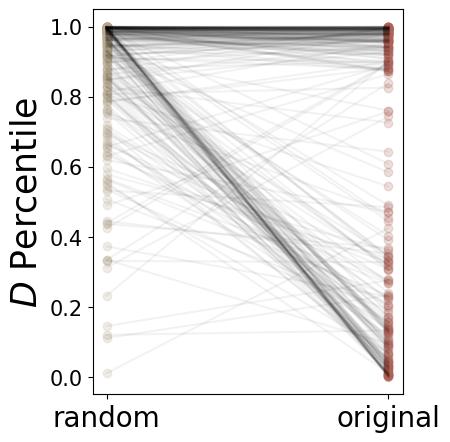

In [29]:
plt.figure(figsize = (4,5))

for i in range(len(milestones_papers_df)):
    plt.plot([0,1],[milestones_papers_df['PCNT_RANK_random/random0_disruption'].iloc[i], milestones_papers_df['PCNT_RANK_original_disruption'].iloc[i]], alpha=0.05,color='black')
plt.scatter([0]*len(milestones_papers_df),milestones_papers_df['PCNT_RANK_random/random0_disruption'],color='#b8a88f',alpha=0.2)
# plt.xlim([0,1])
plt.scatter([1]*len(milestones_papers_df),milestones_papers_df['PCNT_RANK_original_disruption'],color= '#AE6156',alpha=0.2)
plt.xticks([0,1], ['random','original'],size=20)
plt.yticks(size=15)
plt.ylabel('$D$ Percentile',size=25)
plt.savefig('../results/Figures/Figure3c_APS_Milestone_D_Distribution_Compare.png', bbox_inches = 'tight')

<>:20: SyntaxWarning: invalid escape sequence '\D'
<>:20: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_206572/1340544941.py:20: SyntaxWarning: invalid escape sequence '\D'
  xlabel='Quantile of $\Delta$',


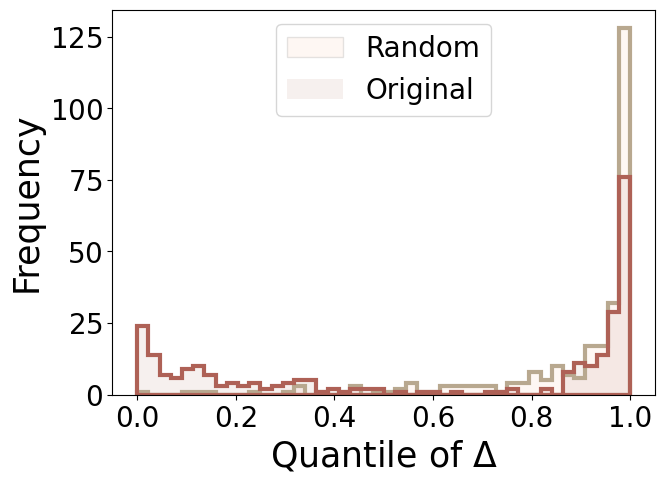

In [26]:
bins = np.linspace(0, 1, 45)


original_color = '#A96D61'
original_color2 = '#802c7f'
original_line_color2 = '#795e68'
original_line_color = '#AE6156'

plot_difference_histograms(
    dataframe=milestones_papers_df,
    column1='PCNT_RANK_random/random0_disruption',
    column2='PCNT_RANK_original_disruption',
    bins=bins,
    label1='Random',
    label2='Original',
    color1='#fab48a',
    color2=original_color,
    edgecolor1='#b8a88f',
    edgecolor2=original_line_color,
    xlabel='Quantile of $\Delta$',
    legend_loc = ['upper center'],
    ylabel='Frequency',
    figsize=(7, 5),
    output_path='../results/Figures/Figure3b_APS_Milestone_D_Distribution.png'
)


# Regression result visualization

<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_206572/1052275198.py:2: SyntaxWarning: invalid escape sequence '\D'
  variable_names = ['D Percentile', '$\Delta$ Percentile', 'log(citations)']
/home/munjkim/Publishing/embedding-disruptiveness_11252024/embedding-disruptiveness-private/libs/util/utils/figure_plot.py:131: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(-0.10,7.5)


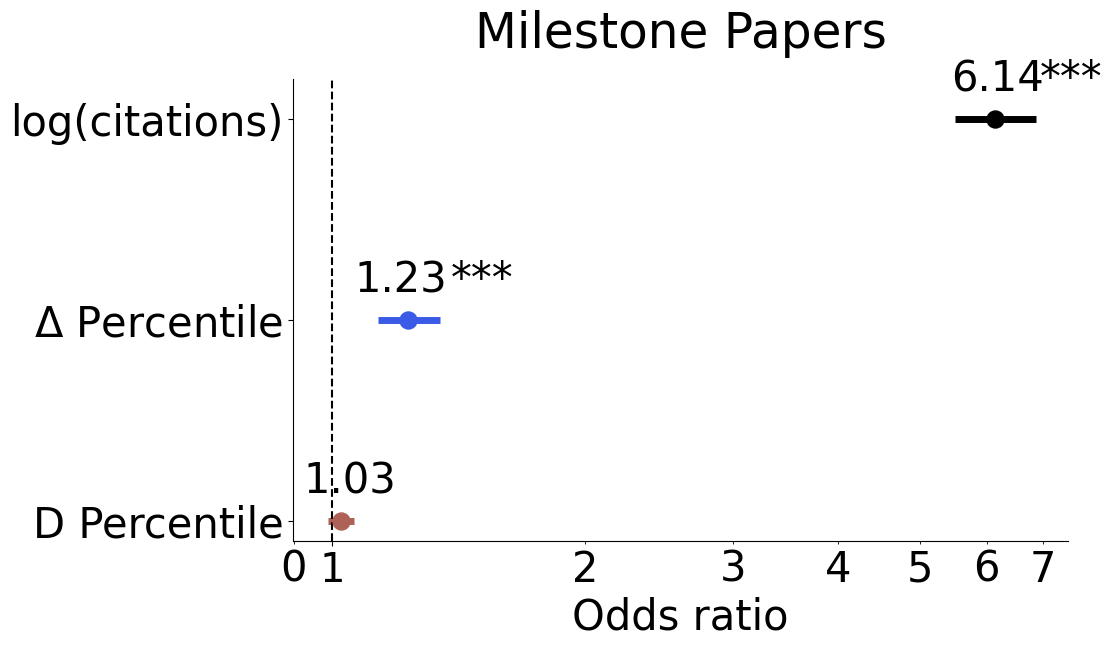

In [27]:
# Example data
variable_names = ['D Percentile', '$\Delta$ Percentile', 'log(citations)']
odds_ratios = np.exp([0.02515155, 0.20887317, 1.81447718])
lower_limits = np.exp([-0.009746573, 0.127107723, 1.705887640])
upper_limits = np.exp([0.06060717, 0.29545359, 1.92677828])
p_values = [0.1585539, 1.754485e-07, 0.0]

# Colors for each variable
colors = ['#AE6156', '#395be6', 'black']

# Call the function
plot_odd_ratio_with_colors(
    variable_names=variable_names,
    odds_ratios=odds_ratios,
    lower_limits=lower_limits,
    upper_limits=upper_limits,
    p_values=p_values,figsize=(10, 6), 
    title='Milestone Papers',
    colors=colors,
    x_adjust_value = [-0.1,-0.17,-0.7],
    y_adjust_value = [0.2,0.2,0.2],
    p_adjust_value = [0,0.15,0.8],
    output_path='../results/Figures/Figure3d_APS_Milestone_Regression.png'  # Save to a file if needed
)


/home/munjkim/Publishing/embedding-disruptiveness_11252024/embedding-disruptiveness-private/libs/util/utils/figure_plot.py:131: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(-0.10,7.5)


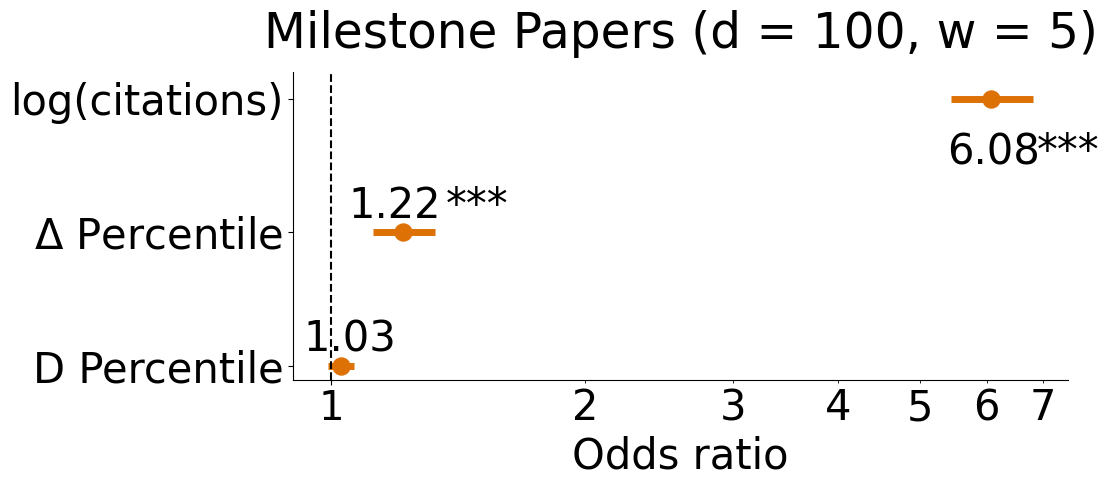

/home/munjkim/Publishing/embedding-disruptiveness_11252024/embedding-disruptiveness-private/libs/util/utils/figure_plot.py:131: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(-0.10,7.5)


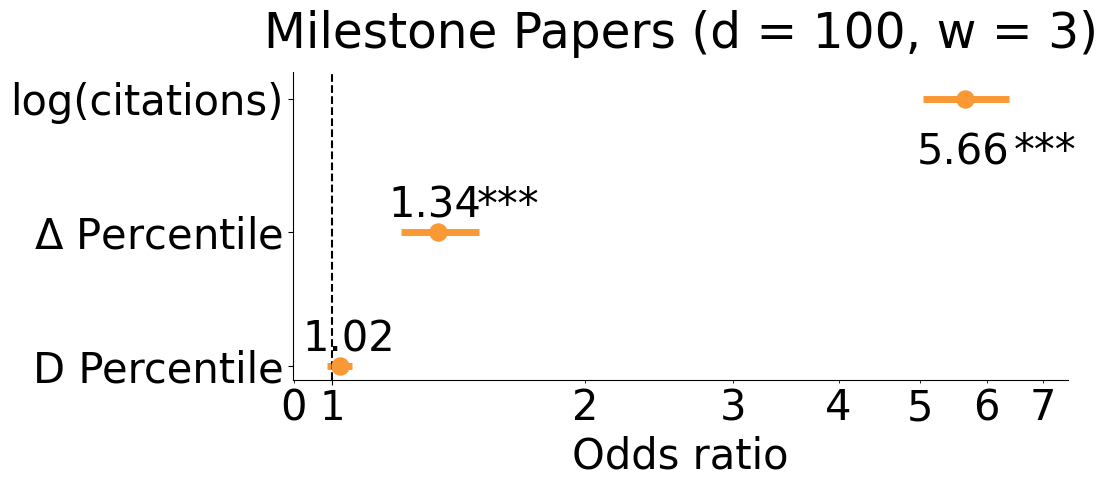

/home/munjkim/Publishing/embedding-disruptiveness_11252024/embedding-disruptiveness-private/libs/util/utils/figure_plot.py:131: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(-0.10,7.5)


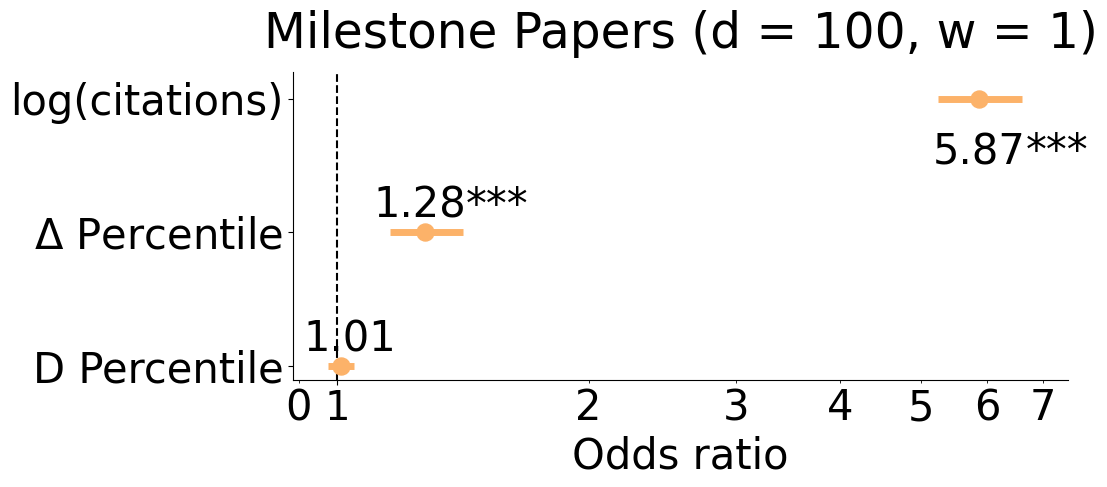

In [34]:

odds_ratios = np.exp( np.array( [0.0261621,  0.1965434, 1.8051443] )  )
upper_limits = np.exp( np.array( [0.06120741,  0.28316971,  1.91946515]))
lower_limits = np.exp(np.array([-0.008386389, 0.114984792,  1.694415872]))
p_values = np.array([0.1585539, 1.754485e-07, 0.0])


colors = ['#DD7105']*3


plot_odd_ratio_with_colors(
    variable_names=variable_names,
    odds_ratios=odds_ratios,
    lower_limits=lower_limits,
    upper_limits=upper_limits,
    p_values=p_values,figsize=(10, 4), 
    title='Milestone Papers (d = 100, w = 5)',
    colors=colors,
    x_adjust_value = [-0.1,-0.17,-0.7],
    y_adjust_value = [0.2,0.2,-0.4],
    p_adjust_value = [0,0.15,0.8],
    output_path='../results/Figures/Supplementary_Information/SI_Figure5_d_100_w_5_regression.png'
)




odds_ratios = np.exp( np.array( [0.02015474,   0.29003963, 1.73364540] )  )
upper_limits = np.exp( np.array( [0.05482141,  0.40202563,  1.85374646]))
lower_limits = np.exp(np.array([-0.01399046, 0.18738311,  1.61729767]))
p_values = np.array([0.1585539, 1.754485e-07, 0.0])

colors = ['#FA9836']*3


plot_odd_ratio_with_colors(
    variable_names=variable_names,
    odds_ratios=odds_ratios,
    lower_limits=lower_limits,
    upper_limits=upper_limits,
    p_values=p_values,figsize=(10, 4), 
    title='Milestone Papers (d = 100, w = 3)',
    colors=colors,
    x_adjust_value = [-0.1,-0.17,-0.7],
    y_adjust_value = [0.2,0.2,-0.4],
    p_adjust_value = [0,0.15,0.8],
    output_path='../results/Figures/Supplementary_Information/SI_Figure5_d_100_w_3_regression.png'
)



# Extract odds ratios and confidence intervals
odds_ratios = np.exp( np.array( [0.01064565  , 0.24315574, 1.76933975] )  )
upper_limits = np.exp( np.array( [0.04747564,  0.34841333,  1.88742837]))
lower_limits = np.exp(np.array([ -0.02556324, 0.14495757,  1.65589195]))
p_values = np.array([0.1585539, 1.754485e-07, 0.0])


colors = ['#FCB269']*3


plot_odd_ratio_with_colors(
    variable_names=variable_names,
    odds_ratios=odds_ratios,
    lower_limits=lower_limits,
    upper_limits=upper_limits,
    p_values=p_values,figsize=(10, 4), 
    title='Milestone Papers (d = 100, w = 1)',
    colors=colors,
    x_adjust_value = [-0.1,-0.17,-0.7],
    y_adjust_value = [0.2,0.2,-0.4],
    p_adjust_value = [0,0.15,0.8],
    output_path='../results/Figures/Supplementary_Information/SI_Figure5_d_100_w_1_regression.png'  # Save to a file if needed
)


/home/munjkim/Publishing/embedding-disruptiveness_11252024/embedding-disruptiveness-private/libs/util/utils/figure_plot.py:131: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(-0.10,7.5)


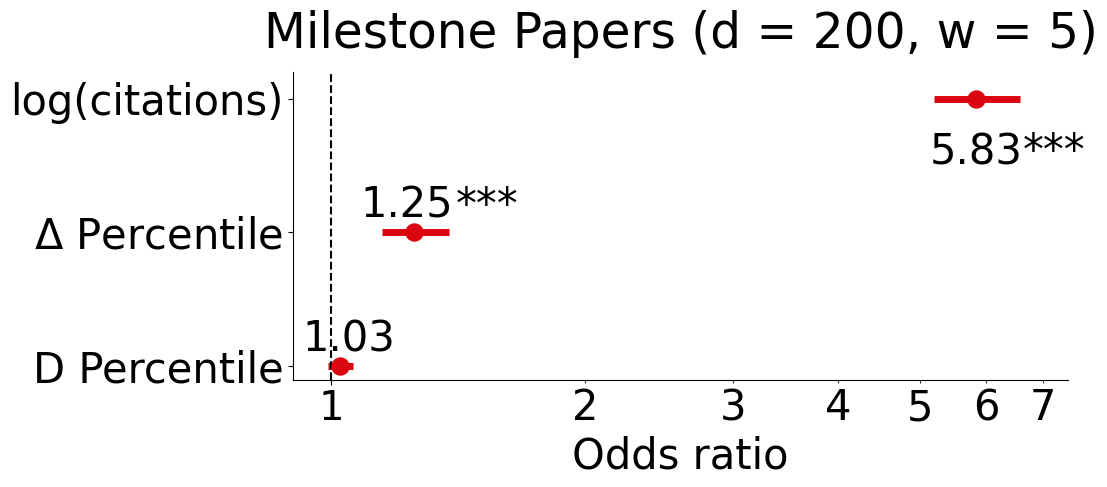

/home/munjkim/Publishing/embedding-disruptiveness_11252024/embedding-disruptiveness-private/libs/util/utils/figure_plot.py:131: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(-0.10,7.5)


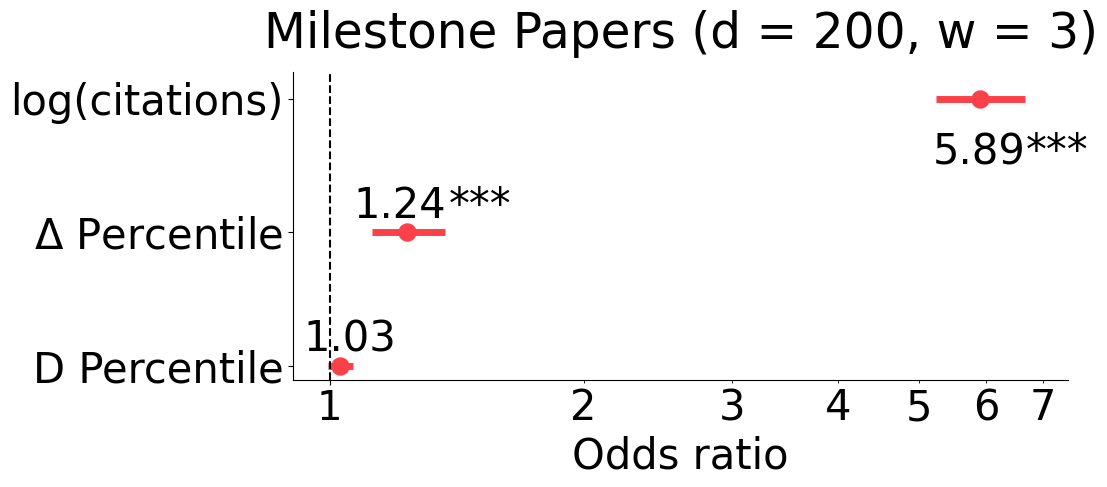

/home/munjkim/Publishing/embedding-disruptiveness_11252024/embedding-disruptiveness-private/libs/util/utils/figure_plot.py:131: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(-0.10,7.5)


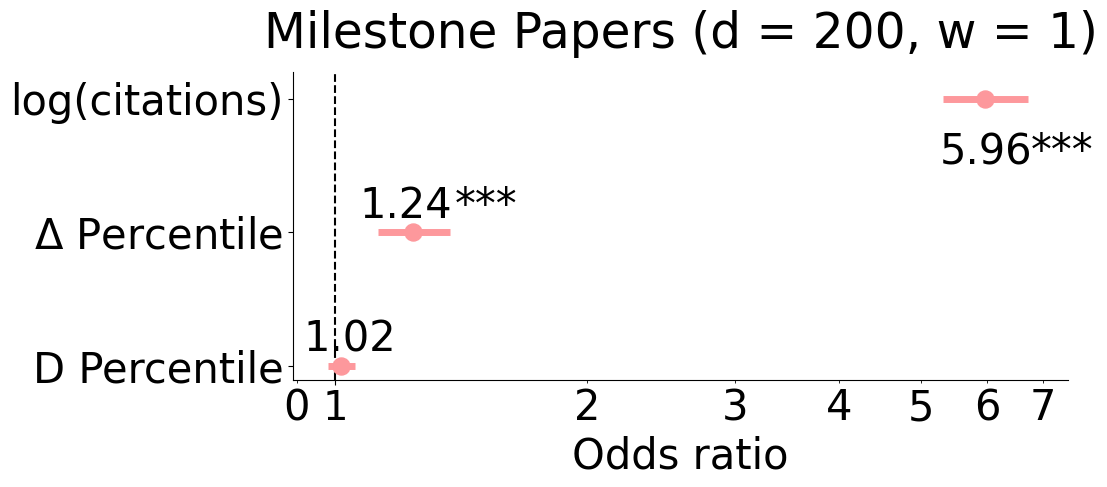

In [33]:

p_values = np.array([0.1585539, 1.754485e-07, 0.0])
odds_ratios = np.exp( np.array( [ 0.02479849,  0.22644308, 1.76367424] )  )
upper_limits = np.exp( np.array( [0.05965683,  0.32118076,  1.88227642]))
lower_limits = np.exp(np.array([ -0.009555769,  0.137826206,  1.649347088]))


colors = ['#DA050F']*3


plot_odd_ratio_with_colors(
    variable_names=variable_names,
    odds_ratios=odds_ratios,
    lower_limits=lower_limits,
    upper_limits=upper_limits,
    p_values=p_values,figsize=(10, 4), 
    title='Milestone Papers (d = 200, w = 5)',
    colors=colors,
    x_adjust_value = [-0.1,-0.17,-0.7],
    y_adjust_value = [0.2,0.2,-0.4],
    p_adjust_value = [0,0.15,0.8],
    output_path='../results/Figures/Supplementary_Information/SI_Figure5_d_200_w_5_regression.png'
)



p_values = np.array([0.1585539, 1.754485e-07, 0.0])


odds_ratios = np.exp( np.array( [ 0.02971406, 0.21190999, 1.77329389] )  )
upper_limits = np.exp( np.array( [ 0.06443092,  0.31591108,  1.89686398]))
lower_limits = np.exp(np.array([ -0.004467326,   0.116211727, 1.653645045]))

colors = ['#FA4149']*3


plot_odd_ratio_with_colors(
    variable_names=variable_names,
    odds_ratios=odds_ratios,
    lower_limits=lower_limits,
    upper_limits=upper_limits,
    p_values=p_values,figsize=(10, 4), 
    title='Milestone Papers (d = 200, w = 3)',
    colors=colors,
    x_adjust_value = [-0.1,-0.17,-0.7],
    y_adjust_value = [0.2,0.2,-0.4],
    p_adjust_value = [0,0.15,0.8],
    output_path='../results/Figures/Supplementary_Information/SI_Figure5_d_200_w_3_regression.png'
)



p_values = np.array([0.1585539, 1.754485e-07, 0.0])
# Extract odds ratios and confidence intervals
odds_ratios = np.exp( np.array( [ 0.01699225, 0.21425900, 1.78564876] )  )
upper_limits = np.exp( np.array( [ 0.0536103,  0.3170386,  1.9048342]))
lower_limits = np.exp(np.array([ -0.01899626,  0.11821311, 1.67120782]))


colors = ['#FD989C']*3


plot_odd_ratio_with_colors(
    variable_names=variable_names,
    odds_ratios=odds_ratios,
    lower_limits=lower_limits,
    upper_limits=upper_limits,
    p_values=p_values,figsize=(10, 4), 
    title='Milestone Papers (d = 200, w = 1)',
    colors=colors,
    x_adjust_value = [-0.1,-0.17,-0.7],
    y_adjust_value = [0.2,0.2,-0.4],
    p_adjust_value = [0,0.15,0.8],
    output_path='../results/Figures/Supplementary_Information/SI_Figure5_d_200_w_1_regression.png'
)


/home/munjkim/Publishing/embedding-disruptiveness_11252024/embedding-disruptiveness-private/libs/util/utils/figure_plot.py:131: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(-0.10,7.5)


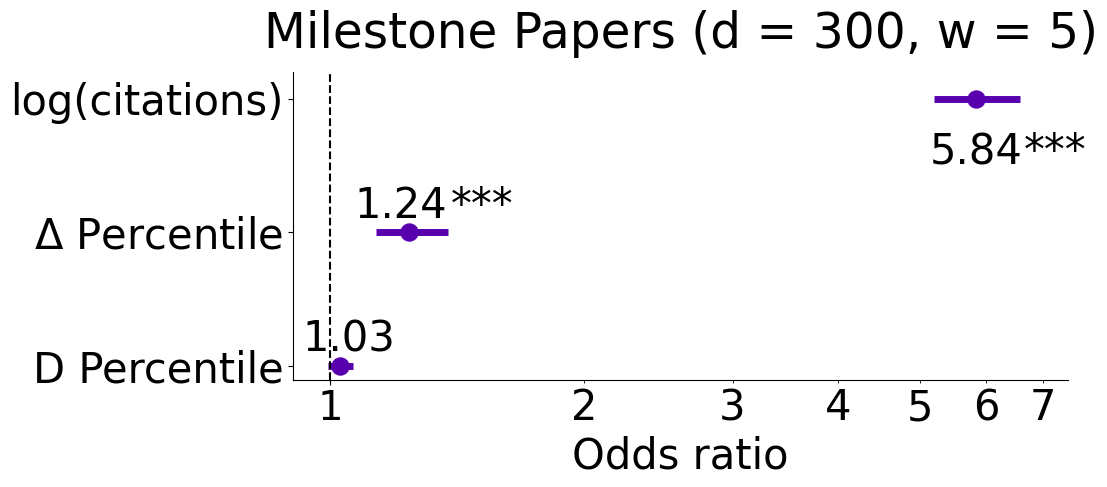

/home/munjkim/Publishing/embedding-disruptiveness_11252024/embedding-disruptiveness-private/libs/util/utils/figure_plot.py:131: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(-0.10,7.5)


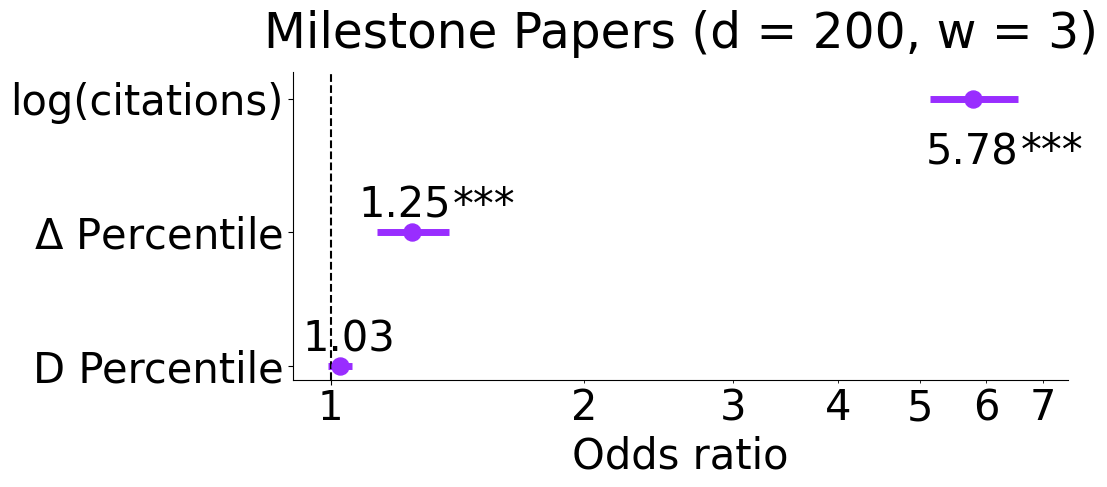

/home/munjkim/Publishing/embedding-disruptiveness_11252024/embedding-disruptiveness-private/libs/util/utils/figure_plot.py:131: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(-0.10,7.5)


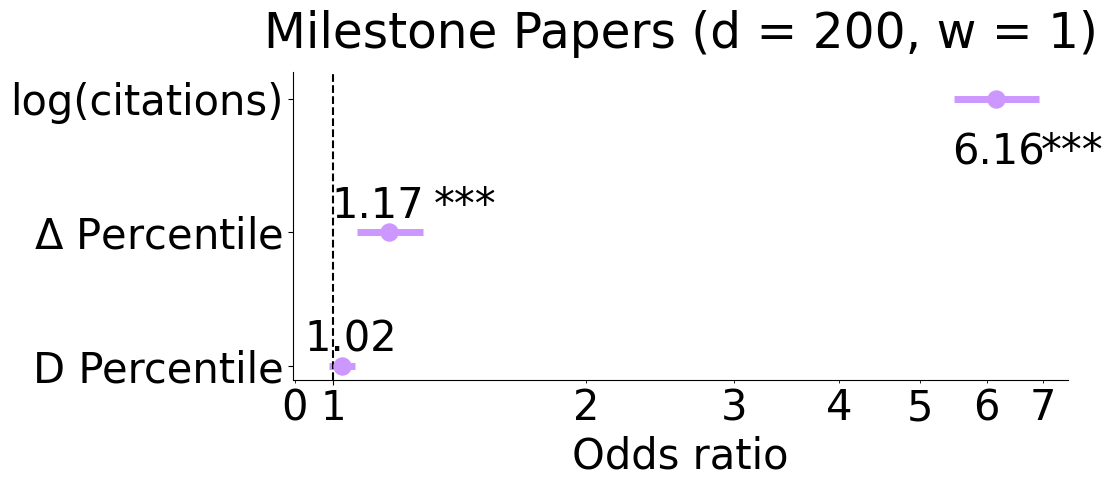

In [35]:
p_values = np.array([0.1585539, 1.754485e-07, 0.0])
odds_ratios = np.exp( np.array( [ 0.02736814, 0.21446684, 1.76427530] )  )
upper_limits = np.exp( np.array( [0.06211768,  0.32118076,  1.88227642]))
lower_limits = np.exp(np.array([ -0.006868997, 0.126101409, 1.648156319]))

colors = ['#5900AE']*3


plot_odd_ratio_with_colors(
    variable_names=variable_names,
    odds_ratios=odds_ratios,
    lower_limits=lower_limits,
    upper_limits=upper_limits,
    p_values=p_values,figsize=(10, 4), 
    title='Milestone Papers (d = 300, w = 5)',
    colors=colors,
    x_adjust_value = [-0.1,-0.17,-0.7],
    y_adjust_value = [0.2,0.2,-0.4],
    p_adjust_value = [0,0.15,0.8],
    output_path='../results/Figures/Supplementary_Information/SI_Figure5_d_200_w_5_regression.png'
)



p_values = np.array([0.1585539, 1.754485e-07, 0.0])
odds_ratios = np.exp( np.array( [ 0.02536241, 0.22147960, 1.75496017] )  )
upper_limits = np.exp( np.array( [0.05949688,  0.32475417,  1.87684853]))
lower_limits = np.exp(np.array([ -0.008276173,  0.126479138, 1.636941906]))

colors = ['#992DFF']*3


plot_odd_ratio_with_colors(
    variable_names=variable_names,
    odds_ratios=odds_ratios,
    lower_limits=lower_limits,
    upper_limits=upper_limits,
    p_values=p_values,figsize=(10, 4), 
    title='Milestone Papers (d = 200, w = 3)',
    colors=colors,
    x_adjust_value = [-0.1,-0.17,-0.7],
    y_adjust_value = [0.2,0.2,-0.4],
    p_adjust_value = [0,0.15,0.8],
    output_path='../results/Figures/Supplementary_Information/SI_Figure5_d_200_w_3_regression.png'
)



p_values = np.array([0.1585539, 1.754485e-07, 0.0])
odds_ratios = np.exp( np.array( [0.02309027,0.15342764, 1.81741252] )  )
upper_limits = np.exp( np.array( [0.05932083, 0.24718369,  1.93607643]))
lower_limits = np.exp(np.array([  -0.01251537, 0.06501823, 1.70342396]))


colors = ['#CC97FF']*3


plot_odd_ratio_with_colors(
    variable_names=variable_names,
    odds_ratios=odds_ratios,
    lower_limits=lower_limits,
    upper_limits=upper_limits,
    p_values=p_values,figsize=(10, 4), 
    title='Milestone Papers (d = 200, w = 1)',
    colors=colors,
    x_adjust_value = [-0.1,-0.17,-0.7],
    y_adjust_value = [0.2,0.2,-0.4],
    p_adjust_value = [0,0.15,0.8],
    output_path='../results/Figures/Supplementary_Information/SI_Figure5_d_300_w_1_regression.png'
)


# Nobel -- Not included in the paper

In [28]:
with open('/home/munjkim/SoS/distance_disruption/data/nobel_prize_doi.pkl', 'rb') as f:
    Nobel = pickle.load(f)

In [29]:
Nobel_doi_lst = [doi for sublist in Nobel.values() for doi in sublist]
Nobel_doi_lst = set(Nobel_doi_lst)

In [30]:
Nobel_papers_df = papers_df[papers_df['doi'].apply(lambda x: x in Nobel_doi_lst)]

In [31]:
nobel_prize = pd.read_csv('../../../../SoS/Disruption/notebooks/Prize-winning paper record.tab',sep='\t')

In [32]:
nobe_prize_physics_title = set(nobel_prize[nobel_prize['Field']=='Physics']['Title'].apply(lambda x: x.lower()))

In [33]:
Nobel_papers_df_2 = papers_df[papers_df['title'].apply(lambda x: x.lower() in nobe_prize_physics_title )]

In [34]:
Nobel_papers_df = pd.concat([Nobel_papers_df,Nobel_papers_df_2]).drop_duplicates()

<>:13: SyntaxWarning: invalid escape sequence '\D'
<>:13: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_176917/2498686388.py:13: SyntaxWarning: invalid escape sequence '\D'
  xlabel='Quantile of $\Delta$',


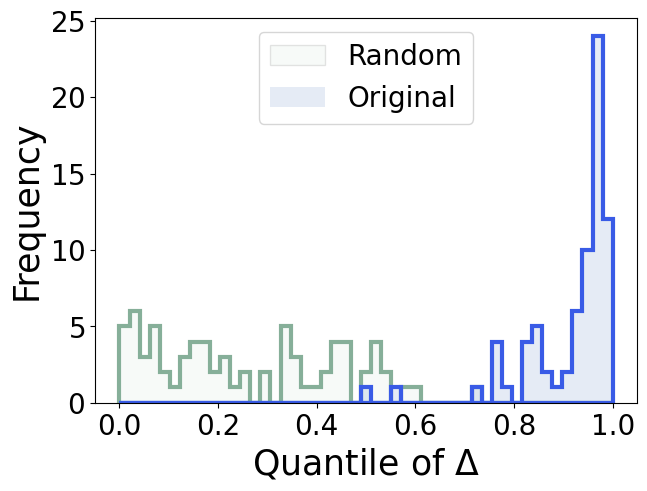

In [35]:
bins = np.linspace(0, 1, 50)
plot_difference_histograms(
    dataframe=Nobel_papers_df,
    column1='PCNT_RANK_random/random0_100_5_q_1_ep_1_bs_1024_embedding_distance',
    column2='PCNT_RANK_original_100_5_q_1_ep_1_bs_1024_embedding_distance',
    bins=bins,
    label1='Random',
    label2='Original',
    color1='#b3d4c1',
    color2= '#00429d',
    edgecolor1='#86af99',
    edgecolor2='#395be6',
    xlabel='Quantile of $\Delta$',
    legend_loc = ['upper center'],
    ylabel='Frequency',
    figsize=(7, 5)
)

<>:20: SyntaxWarning: invalid escape sequence '\D'
<>:20: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_167425/4292039379.py:20: SyntaxWarning: invalid escape sequence '\D'
  xlabel='Quantile of $\Delta$',


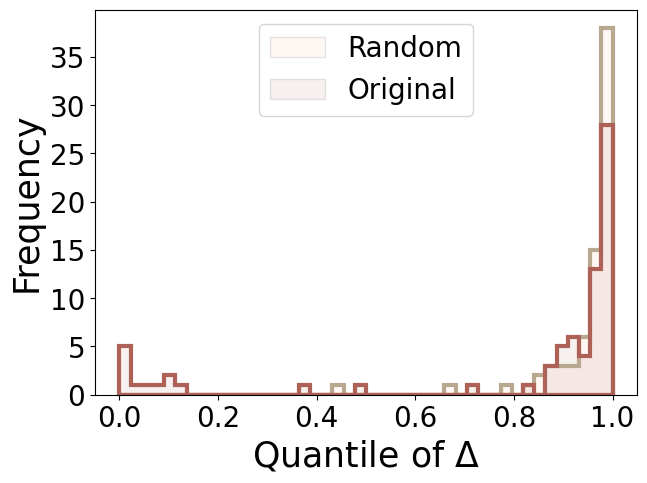

In [49]:
bins = np.linspace(0, 1, 45)


original_color = '#A96D61'
original_color2 = '#802c7f'
original_line_color2 = '#795e68'
original_line_color = '#AE6156'

plot_difference_histograms(
    dataframe=Nobel_papers_df,
    column1='PCNT_RANK_random/random0_disruption',
    column2='PCNT_RANK_original_disruption',
    bins=bins,
    label1='Random',
    label2='Original',
    color1='#fab48a',
    color2=original_color,
    edgecolor1='#b8a88f',
    edgecolor2=original_line_color,
    xlabel='Quantile of $\Delta$',
    legend_loc = ['upper center'],
    ylabel='Frequency',
    figsize=(7, 5)
)


# Review Paper

In [37]:
paper_df_review  = papers_df[(papers_df['journal_code']=='RMP')]

<>:13: SyntaxWarning: invalid escape sequence '\D'
<>:13: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_206572/871012821.py:13: SyntaxWarning: invalid escape sequence '\D'
  xlabel='Quantile of $\Delta$',


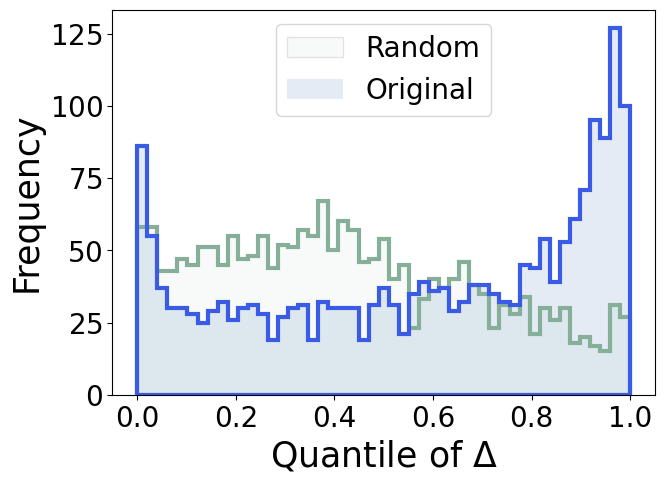

In [40]:
bins = np.linspace(0, 1, 50)
plot_difference_histograms(
    dataframe=paper_df_review,
    column1='PCNT_RANK_random/random0_100_5_q_1_ep_1_bs_1024_embedding_distance',
    column2='PCNT_RANK_original_100_5_q_1_ep_1_bs_1024_embedding_distance',
    bins=bins,
    label1='Random',
    label2='Original',
    color1='#b3d4c1',
    color2= '#00429d',
    edgecolor1='#86af99',
    edgecolor2='#395be6',
    xlabel='Quantile of $\Delta$',
    legend_loc = ['upper center'],
    ylabel='Frequency',
    figsize=(7, 5),
    output_path='../results/Figures/Supplementary_Information/SI_Figure3_Review_APS_EDM.png'
)

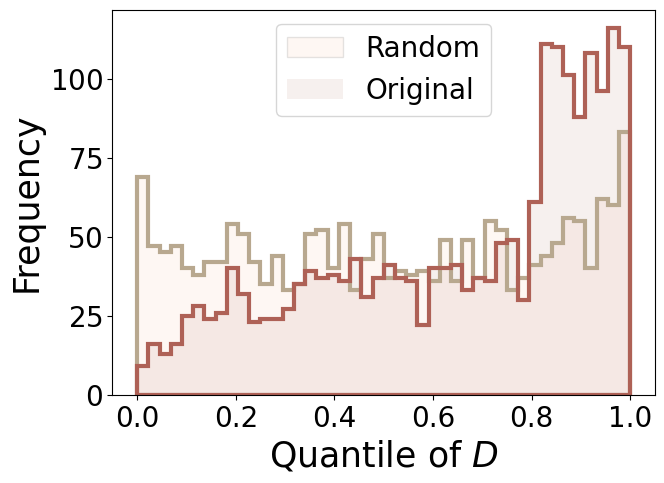

In [39]:
bins = np.linspace(0, 1, 45)


original_color = '#A96D61'
original_color2 = '#802c7f'
original_line_color2 = '#795e68'
original_line_color = '#AE6156'

plot_difference_histograms(
    dataframe=paper_df_review ,
    column1='PCNT_RANK_random/random0_disruption',
    column2='PCNT_RANK_original_disruption',
    bins=bins,
    label1='Random',
    label2='Original',
    color1='#fab48a',
    color2=original_color,
    edgecolor1='#b8a88f',
    edgecolor2=original_line_color,
    legend_loc = ['upper center'],
    xlabel='Quantile of $D$',
    ylabel='Frequency',
    figsize=(7, 5),
    output_path='../results/Figures/Supplementary_Information/SI_Figure3_Review_APS_D.png'
)
